# REDDIT  ANALYSIS

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [2]:
#reading data
data=pd.read_csv("/kaggle/input/core-data-work/CORE DATA.csv")



In [3]:
data 

,clean_post,category
0,My brother in-law (Sammy) lost his home shortl...,3.0
1,Iâve enjoyed reading and posting on this sub...,1.0
2,"I'm back like I said I would be,. My [original...",3.0
3,I'll try to keep this short. I had a [1967 Imp...,3.0
4,I want to sincerely thank everyone who comment...,3.0
...,...,...
12843,every channel showing different numbers what t...,3.0
12844,regardless who won bit pathetic that lalu emer...,3.0
12845,let get over with least will live peace for so...,3.0
12846,holy cow fucking fuck bjp jdu 171 paraphrase s...,3.0


In [4]:
data.head(20)

,clean_post,category
0,My brother in-law (Sammy) lost his home shortl...,3.0
1,Iâve enjoyed reading and posting on this sub...,1.0
2,"I'm back like I said I would be,. My [original...",3.0
3,I'll try to keep this short. I had a [1967 Imp...,3.0
4,I want to sincerely thank everyone who comment...,3.0
5,I am a high schooler with a weekend job at a c...,2.0
6,"Hello, everyone. First of all, thank you all f...",3.0
7,"Note. My step-daughter, Madeline, was about a ...",1.0
8,We had a family dinner this evening. My family...,3.0
9,Iâve become frustrated with how quick a lot ...,2.0


In [5]:
data.value_counts()

clean_post                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [6]:
data.describe()

,category
count,1.284800e+04
mean,1.642279e+07
std,1.861507e+09
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,2.110000e+11


In [7]:
data.columns

Index(['clean_post', 'category'], dtype='object')

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,12848.0,1.642279e+07,1.861507e+09,1.0,1.0,2.0,3.0,2.110000e+11


In [9]:
data.isnull().sum()

clean_post    1
category      0
dtype: int64

In [10]:
data.dropna(axis = 0, inplace = True)

In [11]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [12]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [14]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [15]:
data

,clean_post,category
0,4615,3.0
1,4159,1.0
2,3455,3.0
3,3397,3.0
4,3230,3.0
...,...,...
12843,8394,3.0
12844,10273,3.0
12845,9398,3.0
12846,8841,3.0


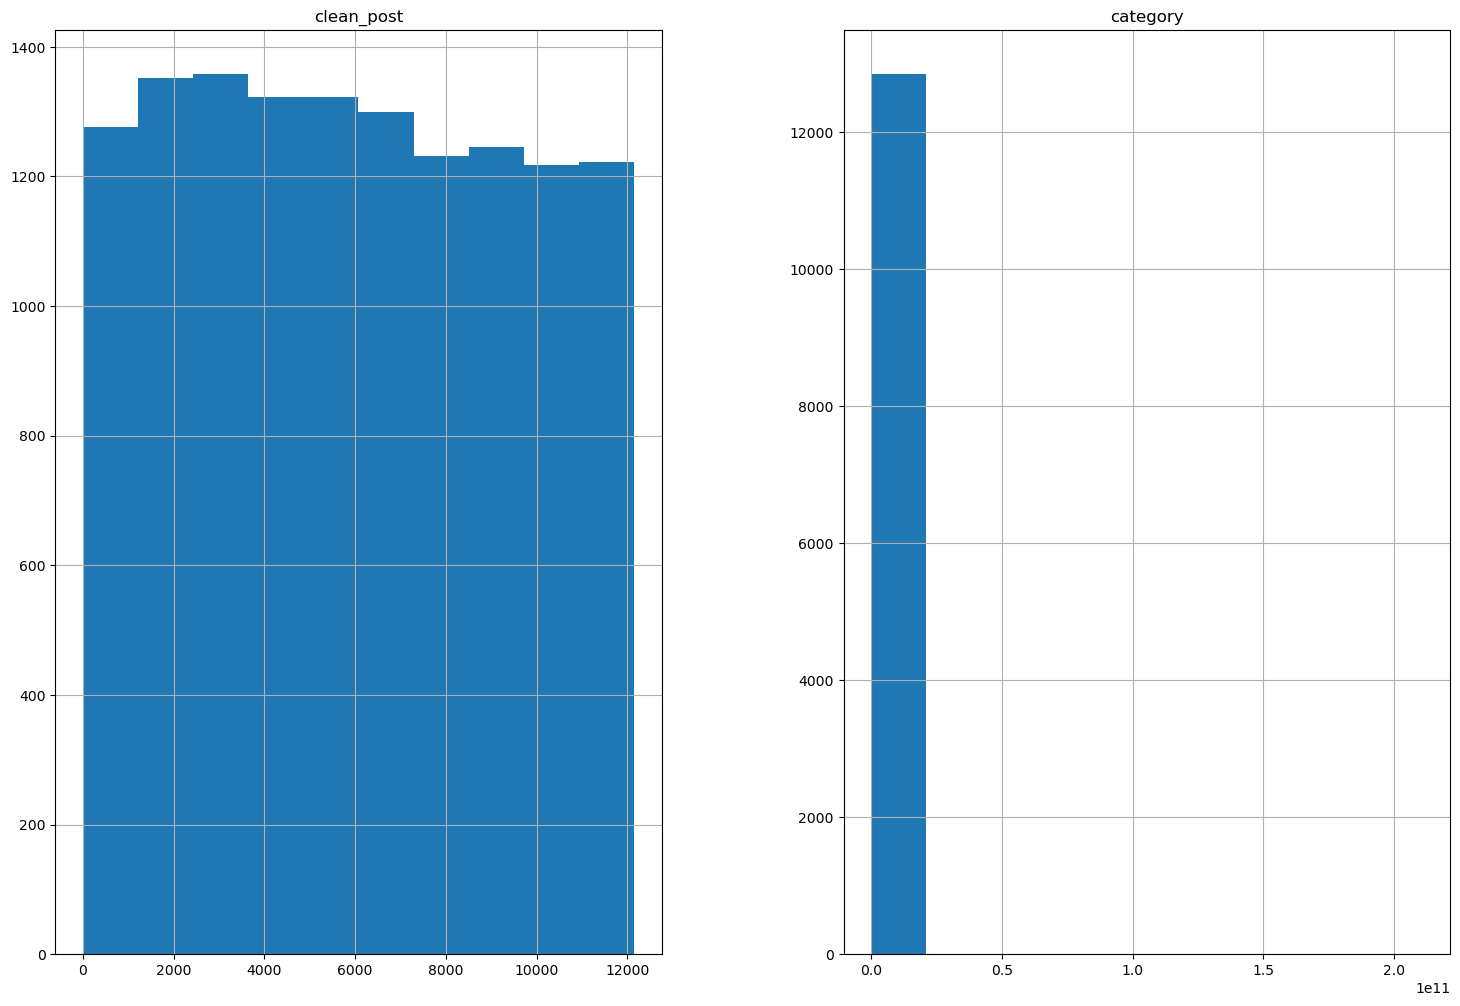

In [16]:
data.hist(figsize=(18,12))
plt.show()


In [17]:
data.corr()

,clean_post,category
clean_post,1.000000,-0.002354
category,-0.002354,1.000000


<Axes: >

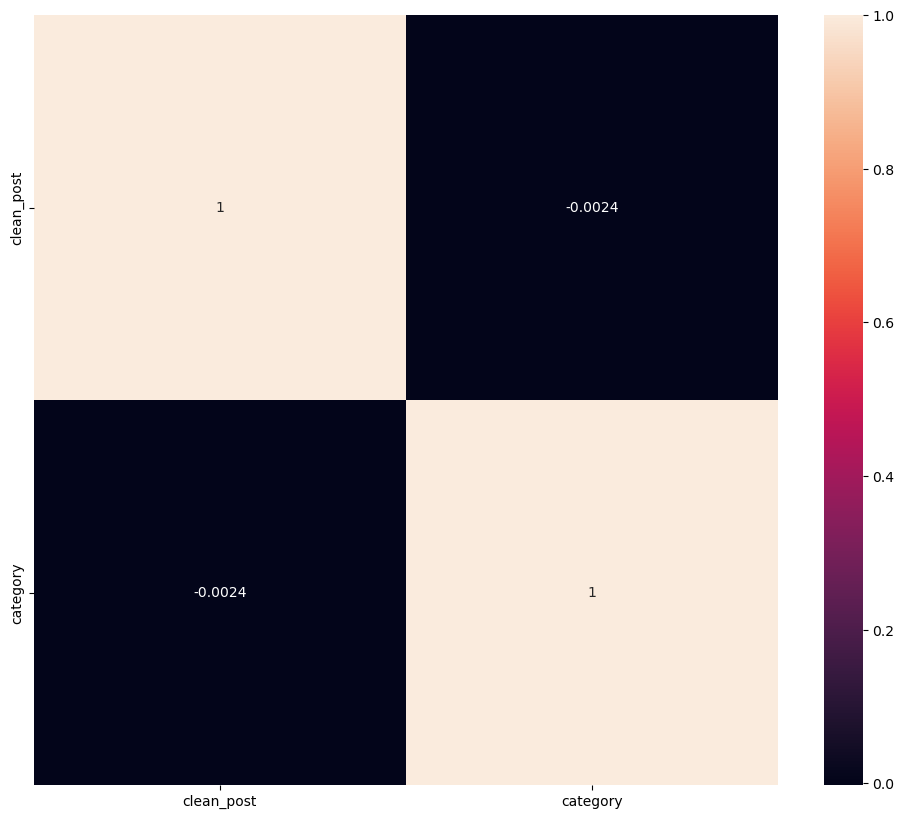

In [18]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


In [19]:
data.shape

(12847, 2)

# NLTK

In [20]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [22]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [23]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [25]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [26]:
data

,clean_post,category
0,4615,3.0
1,4159,1.0
2,3455,3.0
3,3397,3.0
4,3230,3.0
...,...,...
12843,8394,3.0
12844,10273,3.0
12845,9398,3.0
12846,8841,3.0


In [27]:
y=data['category']
x=data.drop('category',axis=1)



# TRAINING AND TESTING DATA

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [30]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


10277
2570
10277
2570


# ANN

In [31]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size = 10,
    epochs=20,
)


Epoch 1/20
1028/1028 [==============================] - 11s 4ms/step - loss: -80000104.0000 - accuracy: 0.2553
Epoch 2/20
1028/1028 [==============================] - 4s 4ms/step - loss: -87608512.0000 - accuracy: 0.2553
Epoch 3/20
1028/1028 [==============================] - 4s 3ms/step - loss: -98945448.0000 - accuracy: 0.2553
Epoch 4/20
1028/1028 [==============================] - 3s 3ms/step - loss: -114571096.0000 - accuracy: 0.2553
Epoch 5/20
1028/1028 [==============================] - 3s 3ms/step - loss: -129843616.0000 - accuracy: 0.2553
Epoch 6/20
1028/1028 [==============================] - 4s 4ms/step - loss: -146388336.0000 - accuracy: 0.2553
Epoch 7/20
1028/1028 [==============================] - 3s 3ms/step - loss: -163865264.0000 - accuracy: 0.2553
Epoch 8/20
1028/1028 [==============================] - 3s 3ms/step - loss: -183617520.0000 - accuracy: 0.2553
Epoch 9/20
1028/1028 [==============================] - 4s 3ms/step - loss: -205752960.0000 - accuracy: 0.2553
Epo

In [32]:
classifier.evaluate(x_test,y_test)

81/81 [==============================] - 0s 4ms/step - loss: -30.7673 - accuracy: 0.2700


[-30.767318725585938, 0.270038902759552]

**MODELS**

**1. KNeighborsClassifier**



In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [34]:

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

         1.0       0.71      0.84      0.77       694
         2.0       0.71      0.85      0.77      1073
         3.0       0.49      0.28      0.35       803

    accuracy                           0.67      2570
   macro avg       0.63      0.66      0.63      2570
weighted avg       0.64      0.67      0.64      2570

Confusion Matrix:
 [[581  20  93]
 [ 18 915 140]
 [221 359 223]]
Training Score:
 74.9148584217184


In [35]:
knn.score(x_test,y_test)*100

66.88715953307393

**2. Naive Bayes**



In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [37]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

         1.0       0.66      0.93      0.78       694
         2.0       0.66      0.91      0.76      1073
         3.0       0.40      0.05      0.09       803

    accuracy                           0.65      2570
   macro avg       0.57      0.63      0.54      2570
weighted avg       0.58      0.65      0.56      2570

Confusion Matrix:
 [[647  29  18]
 [ 47 979  47]
 [279 481  43]]
Training Score:
 65.3303493237326


In [38]:
gnb.score(x_test,y_test)*100

64.94163424124514

**3. DECISION TREE CLASSIFIER**



In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [40]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

         1.0       0.69      0.96      0.80       694
         2.0       0.68      0.98      0.80      1073
         3.0       0.78      0.08      0.14       803

    accuracy                           0.69      2570
   macro avg       0.72      0.67      0.58      2570
weighted avg       0.72      0.69      0.60      2570

Confusion Matrix:
 [[ 665   21    8]
 [  16 1047   10]
 [ 278  462   63]]
Training Score:
 70.06908630923421


In [41]:
dtree.score(x_test,y_test)*100

69.06614785992218

**4.Random Forest Classifier**



In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
                 precision    recall  f1-score   support

           1.0       0.73      0.71      0.72       694
           2.0       0.73      0.76      0.74      1073
           3.0       0.46      0.45      0.45       803
211000000000.0       0.00      0.00      0.00         0

      accuracy                           0.65      2570
     macro avg       0.48      0.48      0.48      2570
  weighted avg       0.65      0.65      0.65      2570

Confusion Matrix:
 [[493  18 183   0]
 [ 20 814 239   0]
 [159 285 358   1]
 [  0   0   0   0]]
Training Score:
 99.50374622944439


**5. Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [45]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Training Score:\n",reg.score(x_train,y_train)*100)
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")


Training Score:
 60.62080373649897
r2 Score of test set : -0.40313067002762937


In [46]:
reg.score(x_test,y_test)*100

61.011673151750976

In [47]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso


In [48]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [49]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")


r2 Score of test set : -771547268259034.9


In [50]:
lin_reg.intercept_


20531285.50063248

In [51]:
lin_reg.coef_


array([-5424850.38573545])

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)


448030906842816.75